Import the libraries for the projects

In [2]:
import pandas as pd
import numpy as np

# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
# from xgboost import XGBClassifier
#metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error

# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

load the dataset

In [3]:
df=pd.read_csv('heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
df.isnull().sum().value_counts

<bound method IndexOpsMixin.value_counts of id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64>

explore each column

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


check the data shape


In [6]:
df.shape

(920, 16)

<Axes: xlabel='age', ylabel='Count'>

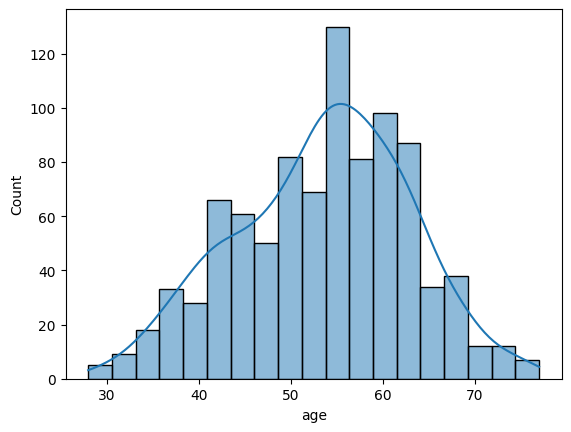

In [7]:
sns.histplot(df['age'],kde=True)

In [8]:
fg=px.histogram(data_frame=df,x='age',color='sex')
fg.show()

In [9]:
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

male has more no of cases of heart dieses as compared to the female


In [10]:
#find the no of male and female
df.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
               ..
Male    77      2
        28      1
        31      1
        33      1
        76      1
Name: count, Length: 91, dtype: int64

In [11]:
#handle the data column dataset
df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [12]:
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

In [13]:
#we want to find that how many males and females are from each area
df.groupby('sex')['dataset'].value_counts()

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64

<Axes: xlabel='dataset', ylabel='count'>

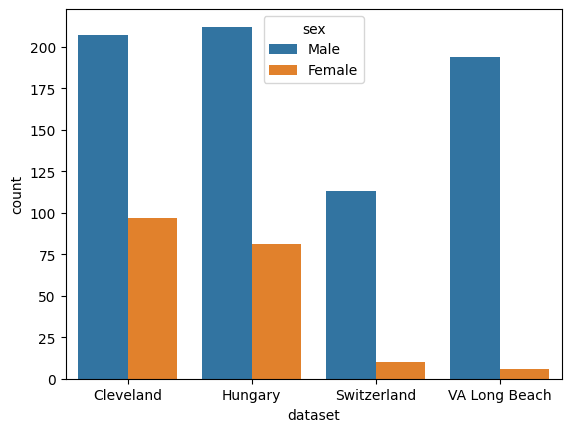

In [14]:
sns.countplot(data=df,x='dataset',hue='sex')

In [15]:
#cp column:- chest pain
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

In [16]:
df.groupby('cp')['age'].value_counts()

cp              age
asymptomatic    57     27
                58     23
                54     22
                59     22
                60     22
                       ..
typical angina  60      1
                63      1
                66      1
                68      1
                74      1
Name: count, Length: 156, dtype: int64

In [17]:
fg=px.histogram(data_frame=df,x='age',color='cp')
fg.show()

In [18]:
#deals with the missing value in trestbps column

percentage_missing_trestbps = df['trestbps'].isnull().sum() / len(df) * 100
print(f"Percentage of missing values in 'trestbps' column: {percentage_missing_trestbps:.2f}%")


Percentage of missing values in 'trestbps' column: 6.41%


In [19]:
#impute the missing value
imputer=SimpleImputer(strategy='median')
df['trestbps']=imputer.fit_transform(df[['trestbps']])
print(f"Missing values in trestbps column : {df['trestbps'].isnull().sum()}")

Missing values in trestbps column : 0


In [20]:
imputer2=IterativeImputer(max_iter=10,random_state=42)
df[['ca','oldpeak','thalch','chol']]=imputer2.fit_transform(df[['ca','oldpeak','thalch','chol']])

In [21]:
(df.isnull().sum()/len(df) * 100).sort_values(ascending=False)

thal        52.826087
slope       33.586957
fbs          9.782609
exang        5.978261
restecg      0.217391
id           0.000000
sex          0.000000
age          0.000000
chol         0.000000
trestbps     0.000000
cp           0.000000
dataset      0.000000
oldpeak      0.000000
thalch       0.000000
ca           0.000000
num          0.000000
dtype: float64

In [23]:
#write down the missing value of the thal column using ml modell remeber that it has 52% missing valuee
categorical_cols = df.select_dtypes(include=['object']).columns

# Fill missing values with mode
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)



In [24]:
(df.isnull().sum()).sort_values(ascending=False)

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

now their is no such missing value now we will move forward


In [25]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [26]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

# Dealing with Outliers

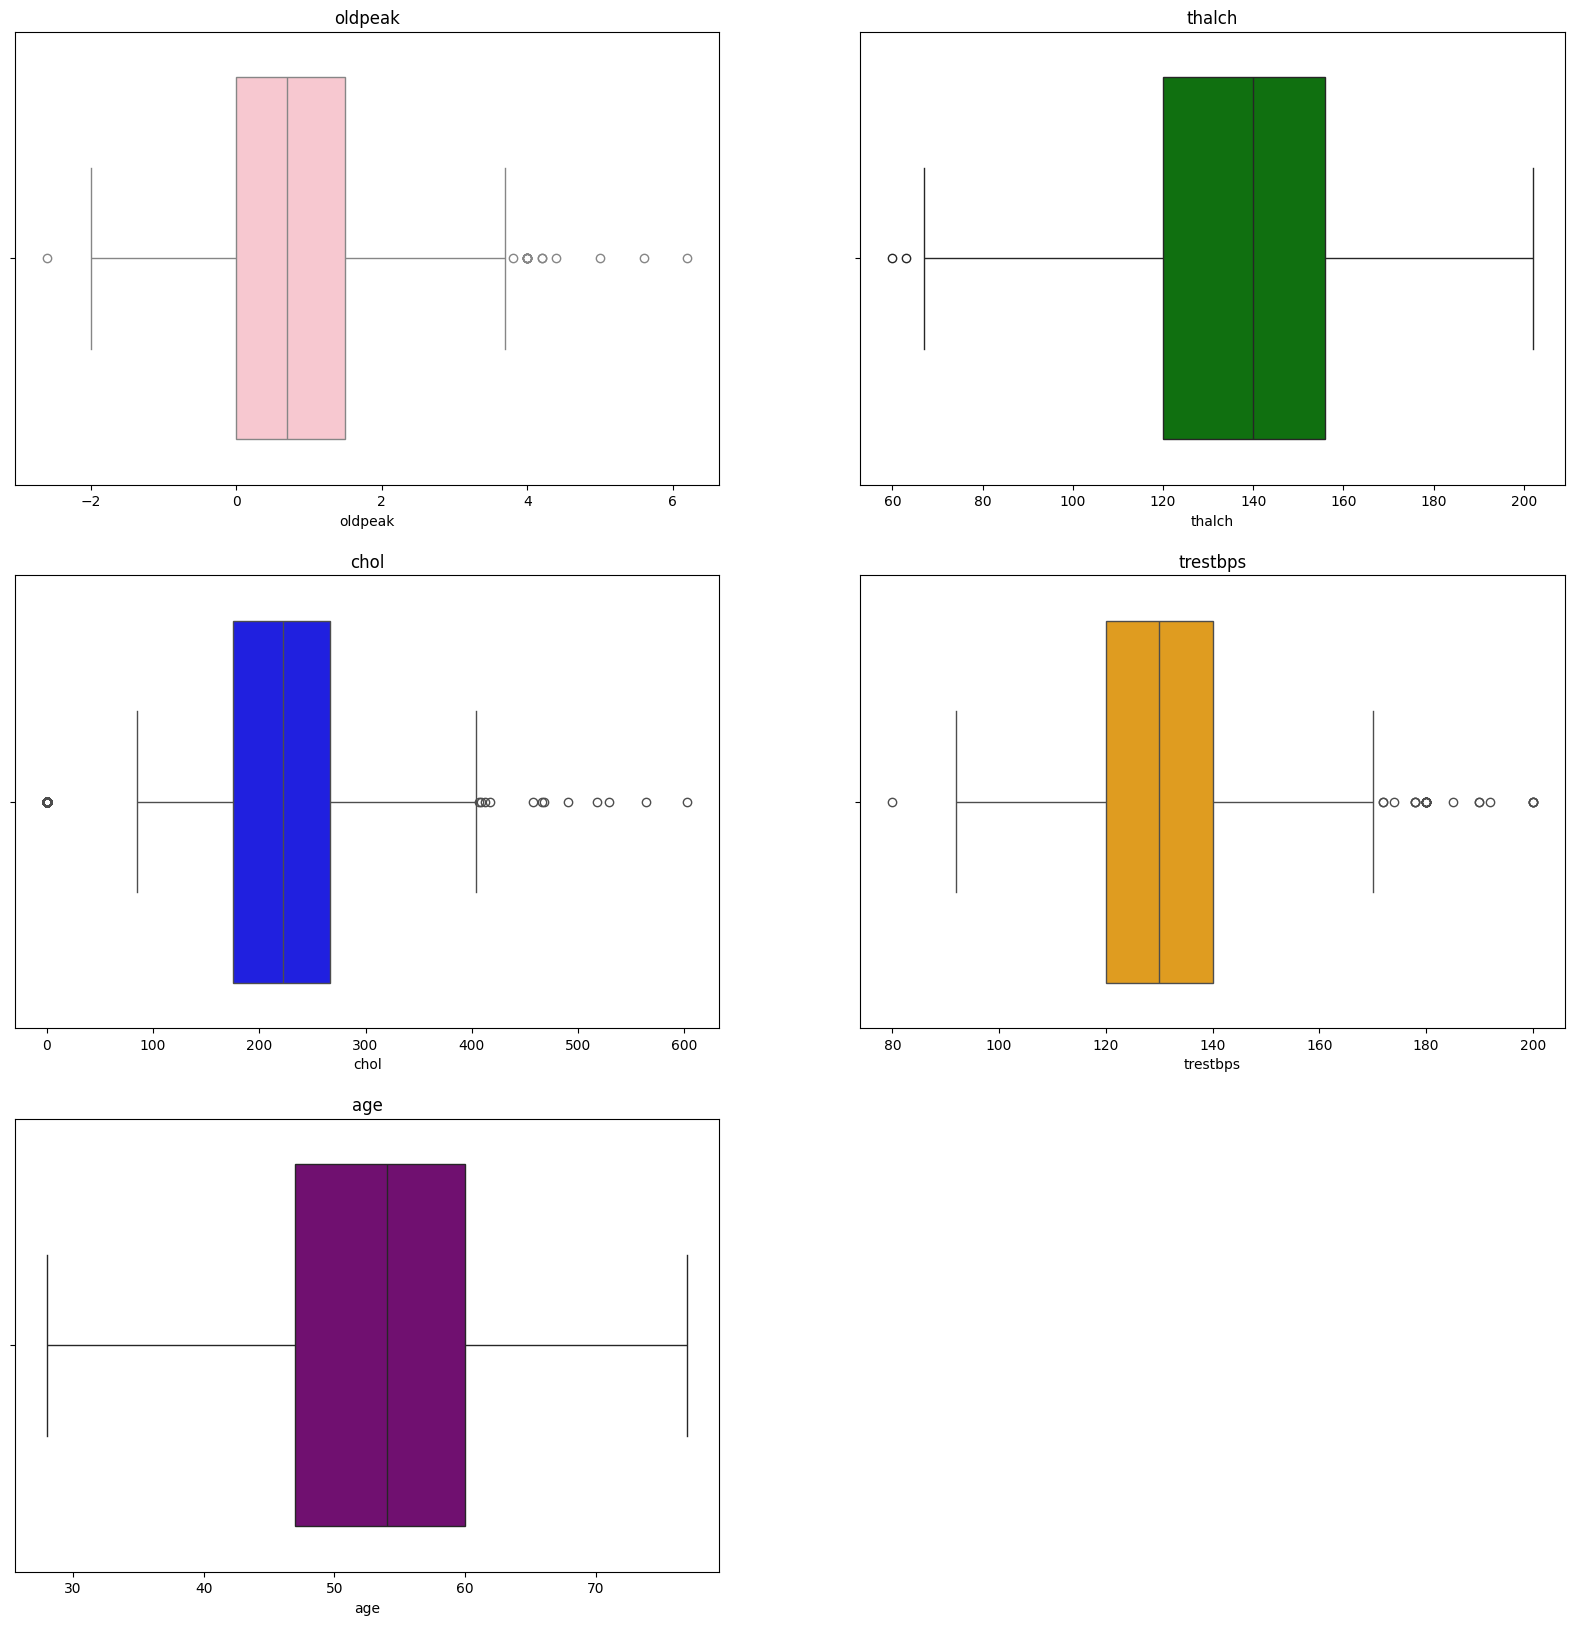

In [33]:
plt.figure(figsize=(20,20))

colors=['pink','green','blue','orange','purple']

for i, col in enumerate(numeric_cols):
    plt.subplot(3,2,i+1)
    sns.boxplot(x=df[col],color=colors[i])
    plt.title(col)

plt.show()    

Based on this boxplot we can conclude that:-
* Age column has no outliers
* trestbps could not be 0 so it is an outlier

In [1]:
df[df['trestbps']==0]
#it is an outlier
#remove this data



NameError: name 'df' is not defined

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 919 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        919 non-null    int64  
 1   age       919 non-null    int64  
 2   sex       919 non-null    object 
 3   dataset   919 non-null    object 
 4   cp        919 non-null    object 
 5   trestbps  919 non-null    float64
 6   chol      919 non-null    float64
 7   fbs       919 non-null    bool   
 8   restecg   919 non-null    object 
 9   thalch    919 non-null    float64
 10  exang     919 non-null    bool   
 11  oldpeak   919 non-null    float64
 12  slope     919 non-null    object 
 13  ca        919 non-null    float64
 14  thal      919 non-null    object 
 15  num       919 non-null    int64  
dtypes: bool(2), float64(5), int64(3), object(6)
memory usage: 109.5+ KB


MACHINE LEARNING

NUM:- PREDICTION VALUEE



The Target Column is num which is the predicted attribute. We will use this column to predict the heart disease. The unique values in this column are: [0, 1, 2, 3, 4], which states that there are 5 types of heart diseases.

0 = no heart disease
1 = mild heart disease
2 = moderate heart disease 
3 = severe heart disease
4 = critical heart disease 

In [36]:
df['num'].value_counts()

num
0    411
1    265
2    109
3    106
4     28
Name: count, dtype: int64

In [47]:
# split the data into X and y
X = df.drop(['num', 'id'], axis=1)

y = df['num']

# encode X data using separate label encoder for all categorical columns and save it for inverse transform
# Task: Separate Encoder for all cat and object columns and inverse transform at the end

label_encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = label_encoder.fit_transform(X[col])
    else:
        pass

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [48]:
# import all models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
# from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
# from lightgbm import LGBMClassifier

# impot pipeline
from sklearn.pipeline import Pipeline

# import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [49]:
# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Ada Boost', AdaBoostClassifier(random_state=42)),
    # ('XG Boost', XGBClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB())
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        # ('imputer', SimpleImputer(strategy='most_frequent')),
        # ('encoder', OneHotEncoder(handle_unknown='ignore')),
        ('model', model)
    ])
    
    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    
    # Calculate mean accuracy# Calculate mean accuracy
    mean_accuracy = scores.mean()
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the performance metrics
    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()
    
    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the best model
print("Best Model:", best_model)

# save the best model
import pickle
pickle.dump(best_model, open('heart_disease_model.pkl', 'wb'))

Model: Random Forest
Cross-validation Accuracy: 0.5878270348837209
Test Accuracy: 0.5688405797101449

Model: Gradient Boosting
Cross-validation Accuracy: 0.5956758720930233
Test Accuracy: 0.5797101449275363

Model: Support Vector Machine
Cross-validation Accuracy: 0.4976986434108527
Test Accuracy: 0.4782608695652174

Model: Logistic Regression
Cross-validation Accuracy: 0.5645591085271318
Test Accuracy: 0.5398550724637681

Model: K-Nearest Neighbors
Cross-validation Accuracy: 0.47117248062015504
Test Accuracy: 0.48188405797101447

Model: Decision Tree
Cross-validation Accuracy: 0.5038517441860465
Test Accuracy: 0.5108695652173914

Model: Ada Boost
Cross-validation Accuracy: 0.5676598837209302
Test Accuracy: 0.5362318840579711

Model: Naive Bayes
Cross-validation Accuracy: 0.5817344961240309
Test Accuracy: 0.5253623188405797

Best Model: Pipeline(steps=[('model', GradientBoostingClassifier(random_state=42))])


In [50]:
import pandas as pd
import pickle  # For loading the trained model
from sklearn.preprocessing import LabelEncoder

# Load the trained model
with open("heart_disease_model.pkl", "rb") as file:  # Change the filename if different
    model = pickle.load(file)

# Define LabelEncoders (Assuming you used Label Encoding for categorical columns)
label_encoders = {
    "sex": LabelEncoder(),
    "dataset": LabelEncoder(),
    "cp": LabelEncoder(),
    "restecg": LabelEncoder(),
    "slope": LabelEncoder(),
    "thal": LabelEncoder(),
    "exang": LabelEncoder(),
    "fbs": LabelEncoder()
}
# label_encoders=LabelEncoder()

# Sample new data point
new_person = pd.DataFrame({
    'id': [921],  
    'age': [55],  
    'sex': ['Male'],  
    'dataset': ['Cleveland'],  
    'cp': ['asymptomatic'],  
    'trestbps': [140.0],  
    'chol': [270.0],  
    'fbs': [False],  
    'restecg': ['normal'],  
    'thalch': [150.0],  
    'exang': [True],  
    'oldpeak': [1.8],  
    'slope': ['flat'],  
    'ca': [2.0],  
    'thal': ['reversable defect'],  
    'num': [None]  # Prediction target
})

# Drop 'id' and 'num' columns (since 'id' is not needed, and 'num' is the target)
new_person = new_person.drop(columns=['id', 'num'])

# Encode categorical columns
for col in label_encoders.keys():
    if col in new_person.columns:
        new_person[col] = label_encoders[col].fit_transform(new_person[col])

# Fill missing values with mean (if needed)
new_person = new_person.fillna(new_person.mean())

# Make a prediction
prediction = model.predict(new_person)

# Display result
print(f"Predicted severity level: {prediction[0]}")



Predicted severity level: 3
